Air Cargo Planning Analysis
==============

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [18]:
search_functions = ['breadth_first_search',
                    'breadth_first_tree_search', 
                    'depth_first_graph_search',
                    'depth_limited_search',
                    'uniform_cost_search',
                    'recursive_best_first_search h_1',
                    'greedy_best_first_graph_search h_1',
                    'astar_search h_1',
                    'astar_search h_ignore_preconditions',
                    'astar_search h_pg_levelsum']

problems = ['Air Cargo Problem 1', 'Air Cargo Problem 2', 'Air Cargo Problem 3']

Initial uninformed search results:

In [40]:
columns = ['Problem', 'Search Function', 'Expansions', 'Goal Tests', 'New Nodes', 'Plan Length', 'Time']

uninformed_search_data = [[problems[0], search_functions[0], 43, 56, 180, 6, 0.05213361400819849],
                          [problems[0], search_functions[1], 1458, 1459, 5960, 6, 1.405408664009883],
                          [problems[0], search_functions[2], 21, 22, 84, 20, 0.01853007500176318],
                          [problems[0], search_functions[3], 101, 271, 414, 50, 0.1474998549965676],
                          [problems[0], search_functions[4], 55, 57, 224, 6, 0.08131684199906886],
                          [problems[1], search_functions[0], 3343, 4609, 30509, 9, 23.547820659005083],
                          [problems[1], search_functions[1]],
                          [problems[1], search_functions[2], 624, 625, 5602, 619, 5.01642145900405],
                          [problems[1], search_functions[3]],
                          [problems[1], search_functions[4], 4852, 4854, 44030, 9, 21.60797010899114],
                          [problems[2], search_functions[0], 14663, 18098, 129631, 12, 164.91272390699305],
                          [problems[2], search_functions[1]],
                          [problems[2], search_functions[2], 408, 409, 3364, 392, 2.8080455220042495],
                          [problems[2], search_functions[3]],
                          [problems[2], search_functions[4], 18223, 18225, 159618, 12, 87.20048963800946],
                         ]

uninformed_search_results = pd.DataFrame(uninformed_search_data, columns=columns)

display(uninformed_search_results)

,Problem,Search Function,Expansions,Goal Tests,New Nodes,Plan Length,Time
0,Air Cargo Problem 1,breadth_first_search,43.0,56.0,180.0,6.0,0.052134
1,Air Cargo Problem 1,breadth_first_tree_search,1458.0,1459.0,5960.0,6.0,1.405409
2,Air Cargo Problem 1,depth_first_graph_search,21.0,22.0,84.0,20.0,0.018530
3,Air Cargo Problem 1,depth_limited_search,101.0,271.0,414.0,50.0,0.147500
4,Air Cargo Problem 1,uniform_cost_search,55.0,57.0,224.0,6.0,0.081317
5,Air Cargo Problem 2,breadth_first_search,3343.0,4609.0,30509.0,9.0,23.547821
6,Air Cargo Problem 2,breadth_first_tree_search,NaN,NaN,NaN,NaN,NaN
7,Air Cargo Problem 2,depth_first_graph_search,624.0,625.0,5602.0,619.0,5.016421
8,Air Cargo Problem 2,depth_limited_search,NaN,NaN,NaN,NaN,NaN
9,Air Cargo Problem 2,uniform_cost_search,4852.0,4854.0,44030.0,9.0,21.607970


In [41]:
excluded_uninformed_search_functions = ['breadth_first_tree_search', 'depth_limited_search']
focussed_uninformed_results = uninformed_search_results[~uninformed_search_results['Search Function'].isin(excluded_uninformed_search_functions)]
display(focussed_uninformed_results)

,Problem,Search Function,Expansions,Goal Tests,New Nodes,Plan Length,Time
0,Air Cargo Problem 1,breadth_first_search,43.0,56.0,180.0,6.0,0.052134
2,Air Cargo Problem 1,depth_first_graph_search,21.0,22.0,84.0,20.0,0.018530
4,Air Cargo Problem 1,uniform_cost_search,55.0,57.0,224.0,6.0,0.081317
5,Air Cargo Problem 2,breadth_first_search,3343.0,4609.0,30509.0,9.0,23.547821
7,Air Cargo Problem 2,depth_first_graph_search,624.0,625.0,5602.0,619.0,5.016421
9,Air Cargo Problem 2,uniform_cost_search,4852.0,4854.0,44030.0,9.0,21.607970
10,Air Cargo Problem 3,breadth_first_search,14663.0,18098.0,129631.0,12.0,164.912724
12,Air Cargo Problem 3,depth_first_graph_search,408.0,409.0,3364.0,392.0,2.808046
14,Air Cargo Problem 3,uniform_cost_search,18223.0,18225.0,159618.0,12.0,87.200490


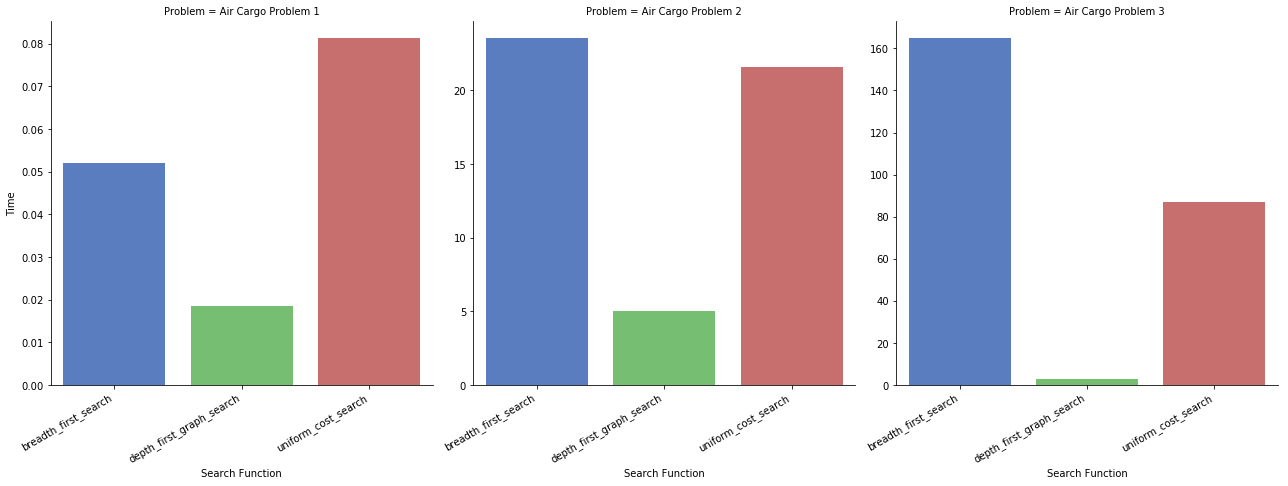

In [47]:
g = sns.factorplot(x="Search Function", y="Time", col="Problem", data=focussed_uninformed_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)

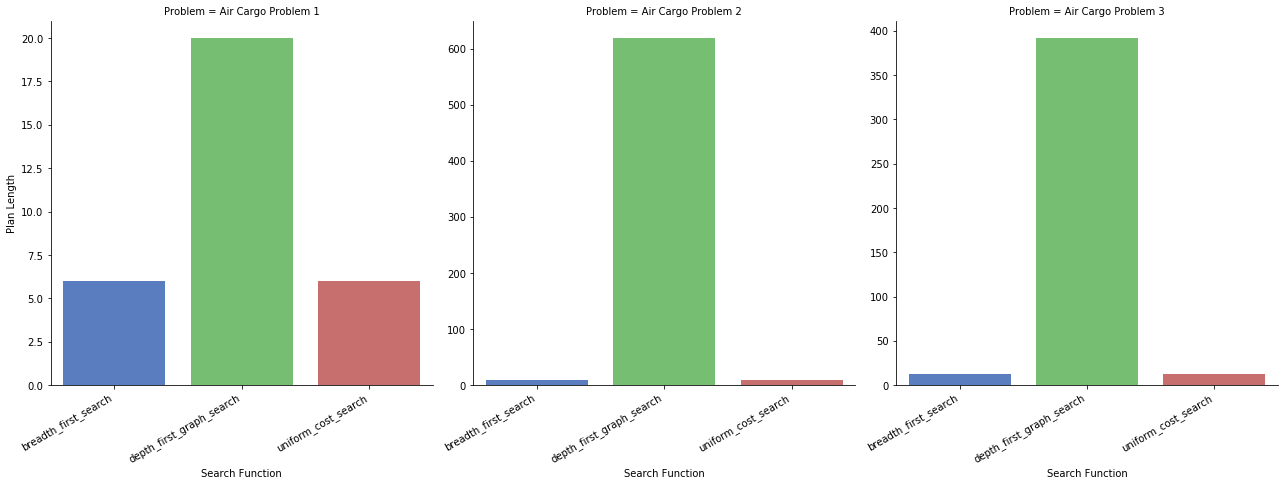

In [48]:
g = sns.factorplot(x="Search Function", y="Plan Length", col="Problem", data=focussed_uninformed_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)

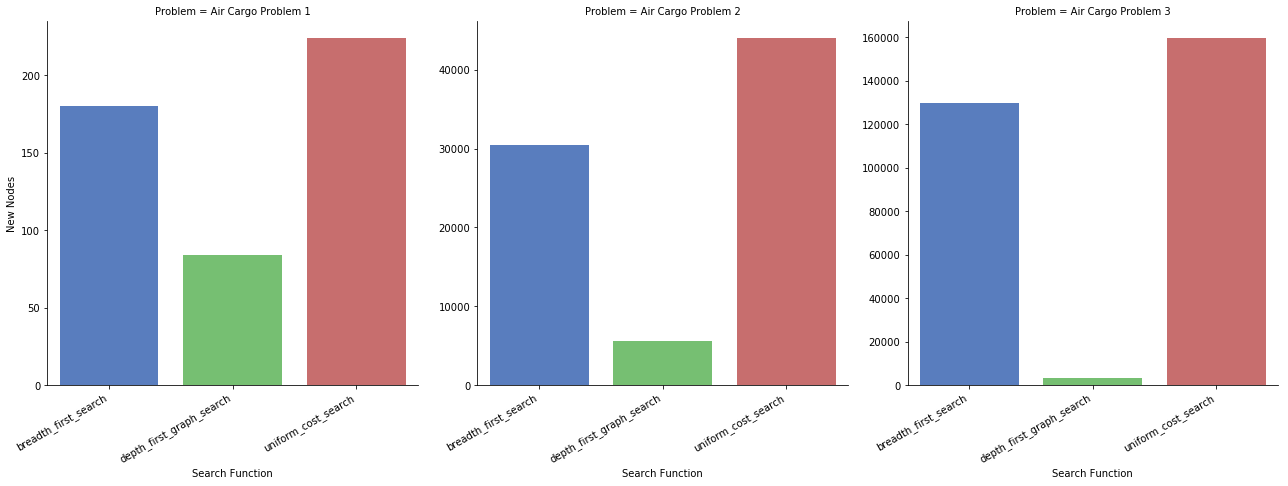

In [51]:
g = sns.factorplot(x="Search Function", y="New Nodes", col="Problem", data=focussed_uninformed_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)

In [43]:
heuristic_search_data = [[problems[0], search_functions[5], 4229, 4230, 17023, 6, 3.887638661006349],
                         [problems[0], search_functions[6], 7, 9, 28, 6, 0.008309947996167466],
                         [problems[0], search_functions[7], 55, 57, 224, 6, 0.05923934999736957],
                         [problems[0], search_functions[8], 42, 44, 176, 6, 0.11635388201102614],
                         [problems[0], search_functions[9], 11, 13, 50, 6, 0.8033037379937014],
                         [problems[1], search_functions[5]],
                         [problems[1], search_functions[6], 990, 992, 8910, 17, 3.32226107599854],
                         [problems[1], search_functions[7], 4852, 4854, 44030, 9, 16.73693438700866],
                         [problems[1], search_functions[8], 3486, 3488, 31795, 9, 32.72852941699966],
                         [problems[1], search_functions[9], 86, 88, 841, 9, 65.13100491200748],
                         [problems[2], search_functions[5]],
                         [problems[2], search_functions[6], 5578, 5580, 49150, 22, 22.83998760599934],
                         [problems[2], search_functions[7], 18223, 18225, 159618, 12, 81.46614847800811],
                         [problems[2], search_functions[8], 13903, 13905, 123148, 12, 188.6789382010029],
                         [problems[2], search_functions[9], 325, 327, 3002, 12, 356.26150441900245],
                        ]

heuristic_search_results = pd.DataFrame(heuristic_search_data, columns=columns)

display(heuristic_search_results)

,Problem,Search Function,Expansions,Goal Tests,New Nodes,Plan Length,Time
0,Air Cargo Problem 1,recursive_best_first_search h_1,4229.0,4230.0,17023.0,6.0,3.887639
1,Air Cargo Problem 1,greedy_best_first_graph_search h_1,7.0,9.0,28.0,6.0,0.008310
2,Air Cargo Problem 1,astar_search h_1,55.0,57.0,224.0,6.0,0.059239
3,Air Cargo Problem 1,astar_search h_ignore_preconditions,42.0,44.0,176.0,6.0,0.116354
4,Air Cargo Problem 1,astar_search h_pg_levelsum,11.0,13.0,50.0,6.0,0.803304
5,Air Cargo Problem 2,recursive_best_first_search h_1,NaN,NaN,NaN,NaN,NaN
6,Air Cargo Problem 2,greedy_best_first_graph_search h_1,990.0,992.0,8910.0,17.0,3.322261
7,Air Cargo Problem 2,astar_search h_1,4852.0,4854.0,44030.0,9.0,16.736934
8,Air Cargo Problem 2,astar_search h_ignore_preconditions,3486.0,3488.0,31795.0,9.0,32.728529
9,Air Cargo Problem 2,astar_search h_pg_levelsum,86.0,88.0,841.0,9.0,65.131005


In [44]:
excluded_heuristic_search_functions = ['recursive_best_first_search h_1']
focussed_heuristic_results = heuristic_search_results[~heuristic_search_results['Search Function'].isin(excluded_heuristic_search_functions)]
display(focussed_heuristic_results)

,Problem,Search Function,Expansions,Goal Tests,New Nodes,Plan Length,Time
1,Air Cargo Problem 1,greedy_best_first_graph_search h_1,7.0,9.0,28.0,6.0,0.008310
2,Air Cargo Problem 1,astar_search h_1,55.0,57.0,224.0,6.0,0.059239
3,Air Cargo Problem 1,astar_search h_ignore_preconditions,42.0,44.0,176.0,6.0,0.116354
4,Air Cargo Problem 1,astar_search h_pg_levelsum,11.0,13.0,50.0,6.0,0.803304
6,Air Cargo Problem 2,greedy_best_first_graph_search h_1,990.0,992.0,8910.0,17.0,3.322261
7,Air Cargo Problem 2,astar_search h_1,4852.0,4854.0,44030.0,9.0,16.736934
8,Air Cargo Problem 2,astar_search h_ignore_preconditions,3486.0,3488.0,31795.0,9.0,32.728529
9,Air Cargo Problem 2,astar_search h_pg_levelsum,86.0,88.0,841.0,9.0,65.131005
11,Air Cargo Problem 3,greedy_best_first_graph_search h_1,5578.0,5580.0,49150.0,22.0,22.839988
12,Air Cargo Problem 3,astar_search h_1,18223.0,18225.0,159618.0,12.0,81.466148


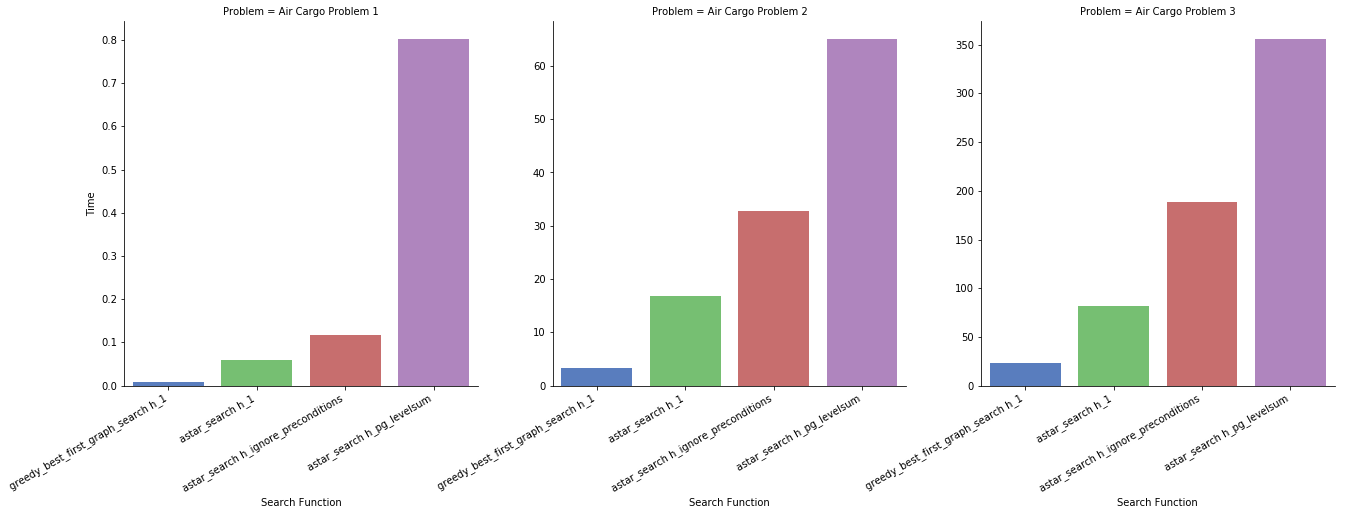

In [46]:
g = sns.factorplot(x="Search Function", y="Time", col="Problem", data=focussed_heuristic_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)

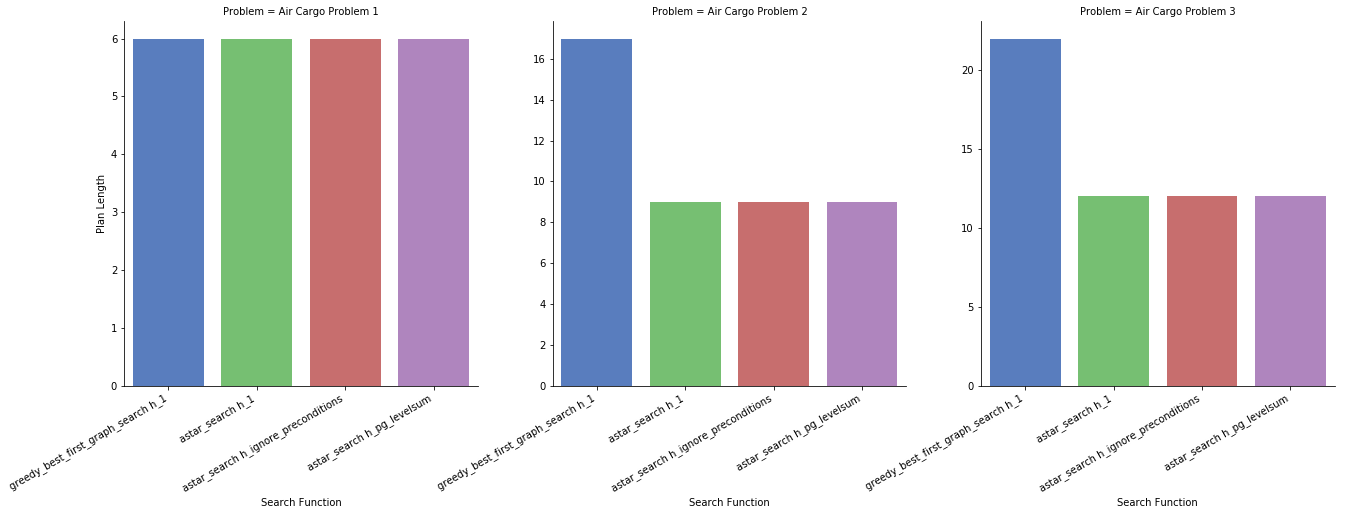

In [49]:
g = sns.factorplot(x="Search Function", y="Plan Length", col="Problem", data=focussed_heuristic_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)

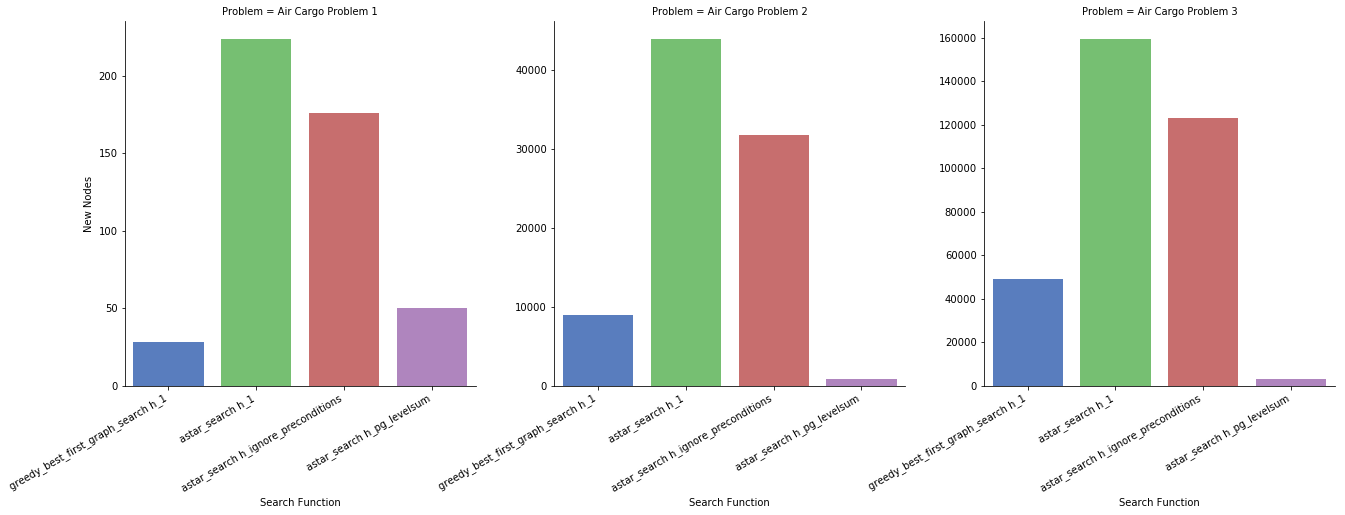

In [50]:
g = sns.factorplot(x="Search Function", y="New Nodes", col="Problem", data=focussed_heuristic_results,
                   size=6, kind="bar", palette="muted", sharey=False)
g.set_xticklabels(horizontalalignment='right', rotation=30)